<a href="https://colab.research.google.com/github/caiomarcelo03/BI_DATAWAREHOUSE_DATALAKE/blob/main/DATAWAREHOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

#
num_produtos = 600
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f'Produto {i}' for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletronicos', 'Roupas', 'Alimentos'], num_produtos)
}

#
df_produtos = pd.DataFrame(produtos)

#
num_vendas = 1000 #
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=30), num_vendas), #
    'produto_id': np.random.randint(1, num_produtos + 1, num_vendas),
    'quantidade' : np.random.randint(50, 200, num_vendas), #
    'valor_total': np.random.randint(1000, 10000, num_vendas) #
}

In [ ]:
#
df_vendas = pd.DataFrame(data_vendas)

#
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

#
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

#
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

#
df_merge.to_csv('data_warehouse.csv', index=False)

#
df_warehouse = pd.read_csv('data_warehouse.csv')
print("Conteúdo do Data Warehouse:")
print(df_warehouse)

Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-04-16         600          72         7288  Produto 600    Alimentos
1    2024-04-26         600         154         5917  Produto 600    Alimentos
2    2024-04-22         600          62         1494  Produto 600    Alimentos
3    2024-04-28         600         155         1980  Produto 600    Alimentos
4    2024-04-16         177         142         5127  Produto 177       Roupas
..          ...         ...         ...          ...          ...          ...
995  2024-04-03         348         172         5639  Produto 348    Alimentos
996  2024-04-07         576         169         6434  Produto 576       Roupas
997  2024-04-28         566         109         2333  Produto 566  Eletronicos
998  2024-04-29         450          93         8657  Produto 450       Roupas
999  2024-04-10          39          93         3882   Produto 39    Alimentos

[1000 rows x 6 columns]

Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 10          721        35984
Produto 101         364        17789
Produto 102         430        14833
Produto 103         364        28551
Produto 104         124         5023
...                 ...          ...
Produto 95          150         6046
Produto 96          131         5220
Produto 97          727        39084
Produto 98          606        24083
Produto 99          185        15393

[490 rows x 2 columns]
Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         43865      1970880
Eletronicos       37072      1536930
Roupas            44358      1940747

Análise de tendencias temporais:
            quantidade  valor_total
data                               
2024-04-01        2792       129010
2024-04-02        5876       280008
2024-04-03        4331       163371
2024-04-04        391

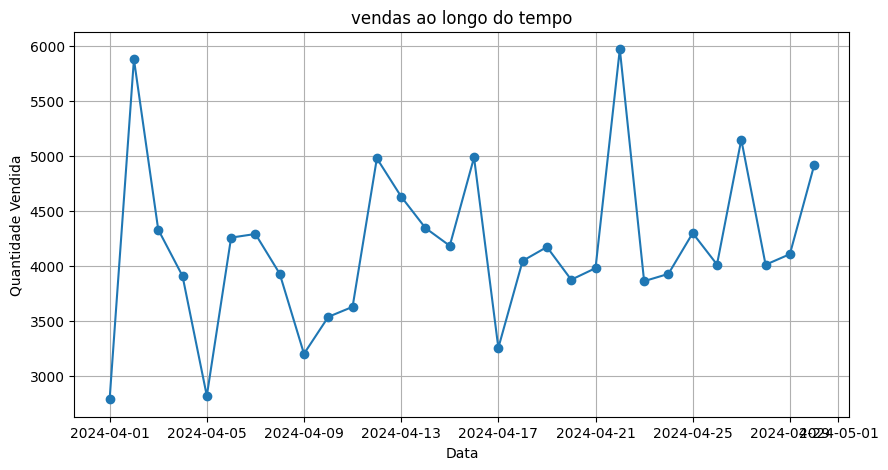


Análise de desempenho de produtos
nome
Produto 10     35984
Produto 101    17789
Produto 102    14833
Produto 103    28551
Produto 104     5023
               ...  
Produto 95      6046
Produto 96      5220
Produto 97     39084
Produto 98     24083
Produto 99     15393
Name: valor_total, Length: 490, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#
df_warehouse = pd.read_csv('data_warehouse.csv')

#
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por produto:")
print(vendas_por_produto)

#
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("Análise de vendas por categoria de produto:")
print(vendas_por_categoria)

#
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendencias temporais:")
print(vendas_por_data)

#
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade Vendida')
plt.grid(True)
plt.show()

#
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos")
print(desempenho_produto)

In [ ]:
import pandas as pd
import numpy as np
import os

#
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
  #
  data = {
      'coluna1' : np.random.randint(0, 100, num_rows_per_file),
      'coluna2' : np.random.randn(num_rows_per_file),
      'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
  }

In [ ]:
#
df = pd.DataFrame(data)

#
file_name = f'data_lake/dados_{i+1}.csv'
df.to_csv(file_name, index=False)

#
dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso")

#
for file_name, df in dfs:
  print(f"\nDados do arquivo: {file_name}\n")
  print(df.head())

Dados do Data Lake gerados com sucesso

Dados do arquivo: data_lake/dados_10.csv

   coluna1   coluna2 coluna3
0        3 -1.887714       A
1       83  0.427748       C
2       67 -0.602578       B
3       43  0.816777       C
4       14  0.124090       B


In [30]:
import pandas as pd
import numpy as np
import os
from sqlalchemy import create_engine

#
if not os.path.exists('data_lake'):
  os.makedirs('data_lake')

#
num_files = 10
num_rows_per_file = 1000

#
dfs = []

#
for i in range(num_files):
  #
  data = {
      'coluna1' : np.random.randint(0, 100, num_rows_per_file),
      'coluna2' : np.random.randn(num_rows_per_file),
      'coluna3' : np.random.choice(['A', 'B', 'C'], num_rows_per_file)
  }
  #
  df = pd.DataFrame(data)

  #
  file_name = f'data_lake/dados_{i+1}.csv'
  df.to_csv(file_name, index=False)

  #
  dfs.append(df)

print("Dados do Data Lake garaods com sucesso!")

#
#
conn_string = 'sqlite:///data_lake.db'

#
engine =create_engine(conn_string)

#
for i, df in enumerate(dfs, 1):
  table_name = f'dados_{i}'
  df.to_sql(table_name, engine, index=False)


Dados do Data Lake garaods com sucesso!


Primeiras linhas do DataFrame
   coluna1   coluna2 coluna3
0        5  0.865564       B
1       67 -0.188823       B
2       49 -0.878234       A
3        3  0.502510       B
4       35 -0.472519       A

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coluna1  1000 non-null   int64  
 1   coluna2  1000 non-null   float64
 2   coluna3  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB
None

Resumo estatístico do DataFrame:
           coluna1      coluna2
count  1000.000000  1000.000000
mean     50.436000    -0.043053
std      28.716904     0.974666
min       0.000000    -2.977145
25%      25.000000    -0.731388
50%      50.000000    -0.043598
75%      76.000000     0.630963
max      99.000000     2.808939


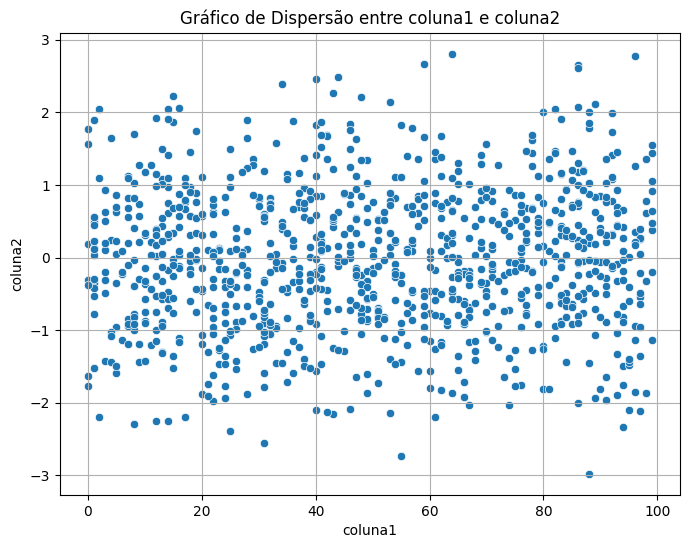

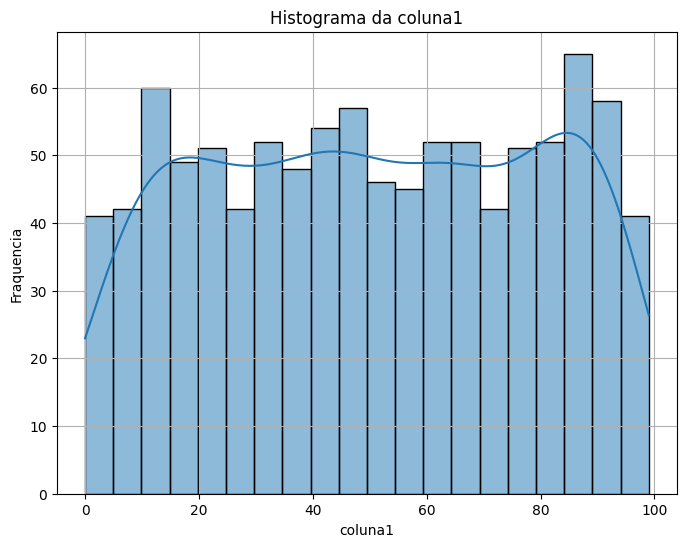

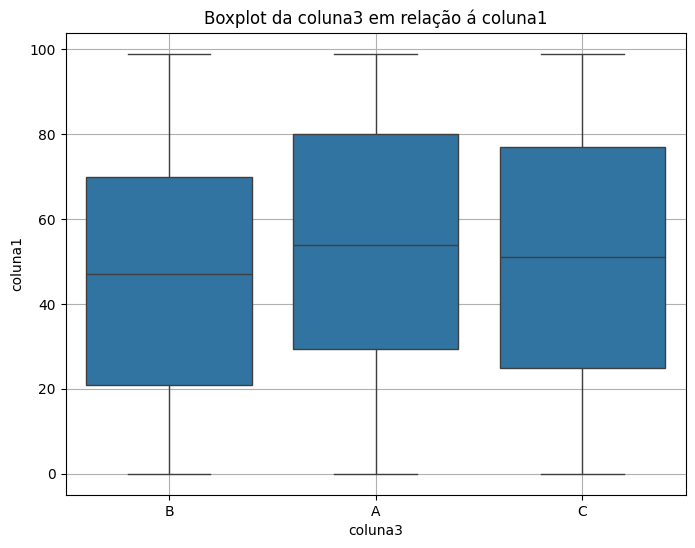

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sqlalchemy import create_engine

#
conn_string = 'sqlite:///data_lake.db'
engine = create_engine(conn_string)

#
table_name = 'dados_1' #
df = pd.read_sql_table(table_name, engine)

#
print("Primeiras linhas do DataFrame")
print(df.head())

#
print("\nInformações sobre o DataFrame:")
print(df.info())

#
print("\nResumo estatístico do DataFrame:")
print(df.describe())
#
#
plt.figure(figsize=(8,6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

#
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title('Histograma da coluna1')
plt.xlabel('coluna1')
plt.ylabel('Fraquencia')
plt.grid(True)
plt.show()

#
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title('Boxplot da coluna3 em relação á coluna1')
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()